# Bank Note Authenticity Classification

This project aims at classifying if a given bank note is authentic using the various features which include variance, skewness, curtosis, entropy, etc.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Importing the dataset:

In [2]:
df=pd.read_csv("BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Exploratory Data Analysis:

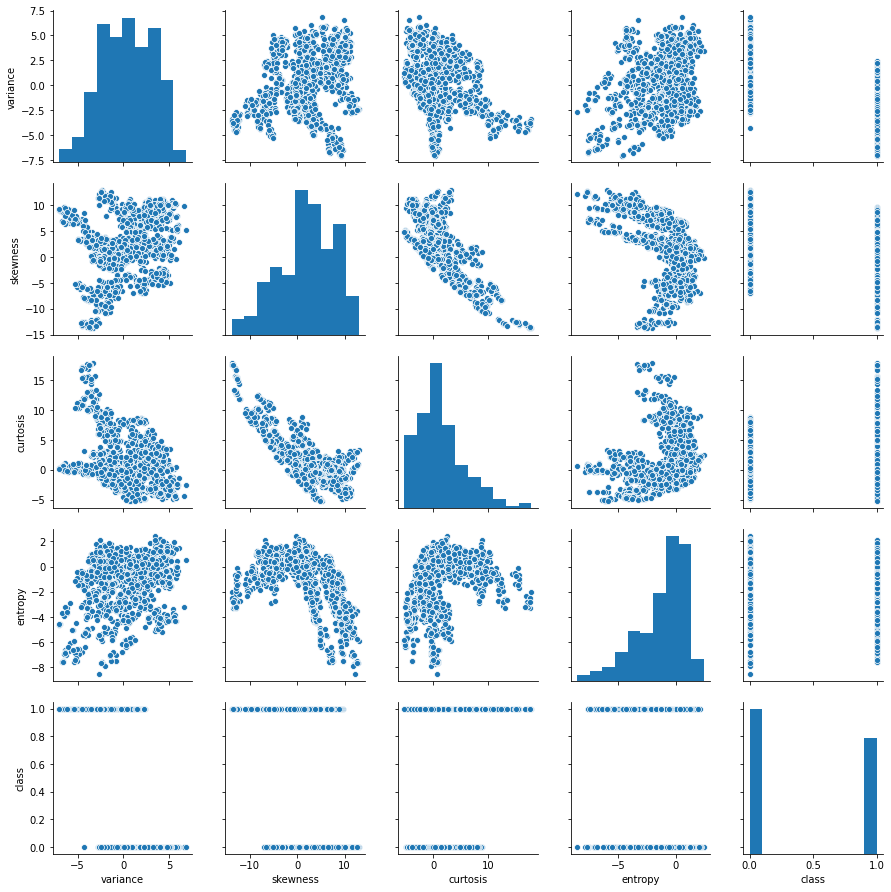

In [3]:
sns.pairplot(df)

## Data PreProcessing:

In [4]:
#Finding the count of null values wrt to attributes/features/columns.

undefined_values=df.isnull().sum()
print(undefined_values)

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [5]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [6]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

## Splitting the dataset:

In [7]:
#Splitting of the train.csv file into 80:20 ratio for training and testing respectively.

from sklearn.model_selection import train_test_split
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('Training set: ',len(X_train))
print('Testing set: ',len(X_test))

Training set:  1097
Testing set:  275


## Implementation of Logistic Regression:

In [8]:
#Implementation of Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
y_pred

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

## Actual vs. Predicted Values :

In [9]:
#Concatenating the Predicted values and actual values in one dataframe lr_op.

lr_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Logistic Regression': y_pred})
lr_op

,Actual value,Predicted value using Logistic Regression
1110,1,1
456,0,0
1234,1,1
703,0,0
368,0,0
...,...,...
423,0,0
1221,1,1
209,0,0
1081,1,1


## Evaluation of the Model :

In [10]:
#Compute the accuracy of Logistic Regression Model:

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression: ",accuracy_score(y_test,y_pred))

Accuracy Score of Logistic Regression:  0.9854545454545455


In [11]:
#Compute the Mean Square error for the Logistic Regression trained model:

from sklearn import metrics
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error for Logistic Regression:', meanSqErr)

Mean Square Error for Logistic Regression: 0.014545454545454545
